# Logistic Regression for Gene Expression Data

In this exercise, we use logistic regression to predict biological characteristics ("phenotypes") from gene expression data. In doing this exercise, you will learn to:
* Handle missing data
* Perform multi-class logistic classification
* Create a confusion matrix (a table of the fraction of samples of class i being confused with class j)
* Use L1-regularization for improved estimation in the case of sparse weights 

## Background

Genes are the basic unit in the DNA and encode blueprints for proteins.  When proteins are synthesized from a gene, the gene is said to "express".  Micro-arrays are devices that measure the expression levels of large numbers of genes in parallel.  By finding correlations between expression levels and phenotypes, scientists can identify possible genetic markers for biological characteristics.

The data in this lab comes from:

https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

In this data, mice were characterized by three properties:
* Whether they had down's syndrome (trisomy) or not
* Whether they were stimulated to learn or not
* Whether they had a drug memantine or a saline control solution.

With these three choices, there are 8 possible classes for each mouse.  For each mouse, the expression levels were measured across 77 genes.  We will see if the characteristics can be predicted from the gene expression levels.  This classification could reveal which genes are potentially involved in Down's syndrome and if drugs and learning have any noticeable effects.


## Load the Data

We begin by loading the standard modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

Use the `pd.read_excel` command to read the data from 

https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls

into a dataframe `df`.  Use the `index_col` option to specify that column 0 is the index.  Use the `df.head()` to print the first few rows.

In [3]:
# TODO
df = pd.read_excel("/Users/caesar/Dropbox/C261/Data_Cortex_Nuclear.xls")

This data has missing values.  The site:

http://pandas.pydata.org/pandas-docs/stable/missing_data.html

has an excellent summary of methods to deal with missing values.  Following the techniques there, create a new data frame `df1` where the missing values in each column are filled with the mean values from the non-missing values.

In [4]:
# TODO
df1 = df.fillna(df.mean())

## Binary Classification for Down's Syndrome

We will first predict the binary class label in `df1['Genotype']` which indicates if the mouse has Down's syndrome or not.  Get the string values in `df1['Genotype'].values` and convert this to a numeric vector `y` with 0 or 1.  You may wish to use the `np.unique` command with the `return_inverse=True` option.

In [77]:
# TODO
vals, y = np.unique(df1['Genotype'], return_inverse = True)

vals = np.array([0, 1])

df1['Genotype'] = pd.Series(vals[y])

For the predictors, we will use all but the last four columns of the dataframes.  First, get the names of these genes with the command:

    xnames = df1.columns[:-4]
    
Then, get the data values corresponding to these columns and store the values in a matrix `X`.  This matrix will have the expression levels for the 77 genes.  Standardize the data matrix and call the standardized matrix `Xs`. 

In [78]:
from sklearn import preprocessing

# Get names of the genes
xnames=df1.columns[1:-4]

# TODO
X = df1[xnames]
Xs = preprocessing.scale(X)

Create a `LogisticRegression` object `logreg` and `fit` the training data.  You can leave the arguments blank or specify `C=1`; those are equivalent.  `C` is an inverse L2 regularization constant.  Changing it changes the results.

In [79]:
# TODO
logreg = c
logreg.fit(Xs, vals[y])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Measure the accuracy of the classifer.  That is, use the `logreg.predict` function to predict labels `yhat` and measure the fraction of time that the predictions match the true labels.  Below, we will properly measure the accuracy on cross-validation data.

In [80]:
# TODO
yhat = logreg.predict(Xs)
y = vals[y]
acc = sum(yhat == y)
print("Fraction of true predictions: ", round(acc/len(yhat), 3))

Fraction of true predictions:  0.985


## Interpreting the weight vector

Create a stem plot of the coefficients, `W` in the logistic regression model.  You can get the coefficients from `logreg.coef_`, but you will need to reshape this to a 1D array.  (Unlike in R or matlab, in Python, an `n`-length row or column vector is considered to be of shape or size `n`.  It is a 1-dimensional object, not an `nx1` or `1xn` object.  So a 2D array consisting of only 1 row or 1 column is not the same thing as being a 1D array.  You can use the `ravel` method where if `u` is `1xn`, `u.ravel()` would return a 1d version of `u`.)

Text(0,0.5,'Coeff values')

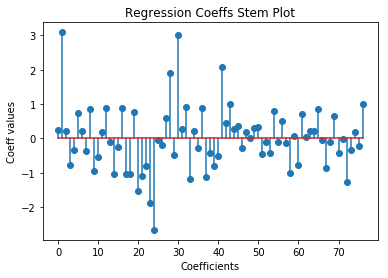

In [81]:
# TODO
W = logreg.coef_
W = np.ravel(W)
# Plot W
plt.figure()
plt.stem(W)
plt.title("Regression Coeffs Stem Plot")
plt.xlabel("Coefficients")
plt.ylabel("Coeff values")

You should see that `W[i]` is very large for a few components `i`.  These are the genes that are likely to be most involved in Down's Syndrome.  Although, we do not discuss it in this class, there are ways to force the logistic regression to return a sparse vector `W`.  

Find the names of the genes for two components `i` where the magnitude of `W[i]` is largest. You could use the command np.argsort with the appropriate arguments.

In [82]:
# TODO
large = np.argsort(W)
print("Two most invovled genes components: ", large[0:2])

Two most invovled genes components:  [24 23]


## Cross Validation

The above meaured the accuracy on the training data.  It is better to measure the accuracy on the test data.  Perform 10-fold cross validation and measure the accuracy.  Note, that in performing the cross-validation, you will want to randomly permute the test and training sets using the `shuffle` option.  In this data set, all the samples from each class are bunched together, so shuffling is essential.  Print the mean accuracy across all the folds.  (If you already did the homework and found precision, f1-score and recall, that is fine.  You do not have to redo this slightly easier version. If you want to the latter, you will need to import precision_recall_fscore_support from sklearn.metrics.)

In [83]:
# TODO A possible beginning here
from sklearn.model_selection import KFold

# This line is not necesssary if you are just finding accuracy
from sklearn.metrics import precision_recall_fscore_support

nfold = 10
kf = KFold(n_splits=nfold, random_state = 1,shuffle=True)

# Create an empty list acc with desired length, for memory efficiency
acc = [None]*nfold

for i, v in enumerate(kf.split(Xs)):
    Xtr = Xs[v[0].tolist()]
    Xts = Xs[v[1].tolist()]
    ytr = y[v[0].tolist()]
    yts = y[v[1].tolist()]
    
    # Calculate and store all accuracies
    logreg.fit(Xtr, ytr)
    yhati = logreg.predict(Xts)
    # Store the fractions directly in acc
    acc[i] = sum(yhati == yts)/len(yts)

# Print results
print("Mean accuracy across all folds = ", round(np.mean(acc), 3))

Mean accuracy across all folds =  0.972


## Multi-Class Classification

Now use the response variable in `df1['class']`.  This data has 8 possible classes from the three binary properties of mice described above.  Use the `np.unique` funtion as before to convert this to a vector `y` with values 0 to 7. You can see them by starting below.

In [93]:
ystr = df1['class'].values
# TODO
vals, y = np.unique(ystr, return_inverse = True)

vals2 = np.array(list(range(8)))

df1['class'] = pd.Series(vals2[y])

# Create this response variable object
y = vals2[y]

Fit a multi-class logistic model by creating a `LogisticRegression` object, `logreg` and then calling the `logreg.fit` method.  Again, use C=1 or leave the arguments blank.  

In [95]:
# TODO
logreg = linear_model.LogisticRegression(C=1)
logreg.fit(Xs, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Measure the accuracy on the training data.

In [96]:
# TODO
# Just the same as before
yhat = logreg.predict(Xs)
acc = sum(yhat == y)
print("Accuracy (Fraction of true predictions): ", round(acc/len(yhat), 3))

Accuracy (Fraction of true predictions):  0.999


Now perform 10-fold cross validation, and measure the confusion matrix `C` on the test data in each fold. You can use the `confusion_matrix` method in the `sklearn` package.  Add the confusion matrix counts across all folds and then normalize the rows of the confusion matrix so that they sum to one.  Thus, each element `C[i,j]` will represent the fraction of samples where `yhat==j` given `ytrue==i`.  Print the confusion matrix.  You can use the command

    print(np.array_str(C, precision=4, suppress_small=True))
    
to create a nicely formatted print.  Also print the overall mean and SE of the test accuracy across the folds.

In [112]:
# TODO  POssible beginning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

logreg = linear_model.LogisticRegression()

# Initialize the confusion matrix counts
ny = np.max(y)
C = np.zeros((ny+1,ny+1))

nfold = 10
kf = KFold(n_splits=nfold, random_state = 1,shuffle=True)

for i, v in enumerate(kf.split(Xs)):
    Xtr = Xs[v[0].tolist()]
    Xts = Xs[v[1].tolist()]
    ytr = y[v[0].tolist()]
    yts = y[v[1].tolist()]
    
    # Calculate and store all accuracies
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    # Create confusion matrix for the current iteration
    ctemp = confusion_matrix(yts, yhat)
    # Add it to the confusion matrix C
    C = C + ctemp

C = preprocessing.normalize(C, axis = 1)
# Print results
print(np.array_str(C, precision=4, suppress_small=True))

[[0.9998 0.0068 0.     0.     0.0205 0.     0.     0.    ]
 [0.0075 0.9999 0.     0.     0.0075 0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.     0.0067]
 [0.0075 0.     0.     1.     0.     0.     0.     0.    ]
 [0.0075 0.0075 0.     0.     0.9999 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]


Re-run the logistic regression on the entire training data and get the weight coefficients.  This should be a 8 x 77 matrix.  Create a stem plot of the first row of this matrix to see the coefficients on each of the genes for predicting the first class.

Confirming dimensions of the weight matrix:  (8, 77)


Text(0,0.5,'Coeff values')

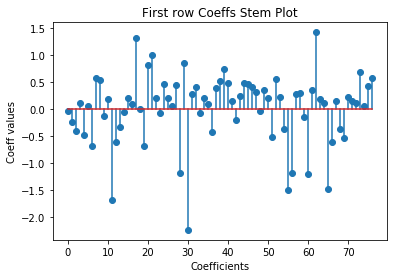

In [117]:
# TODO
# Fit the model on the entire data set
logreg.fit(Xs, y)
# Obtain the weight matrix
W = logreg.coef_

# Confirm its dimensions
print("Confirming dimensions of the weight matrix: ", np.shape(W))

# Plot the coefficients
plt.figure()
plt.stem(W[1])
plt.title("First row Coeffs Stem Plot")
plt.xlabel("Coefficients")
plt.ylabel("Coeff values")

## L1-Regularization


In most genetic problems, only a limited number of the tested genes are likely influence any particular attribute.  Hence, we would expect that the weight coefficients in the logistic regression model should be sparse.  That is, they should be zero on any gene that plays no role in the particular attribute of interest.  Genetic analysis commonly imposes sparsity by adding an l1-penalty term.  Read the `sklearn` [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the `LogisticRegression` class to see how to set the l1-penalty and the inverse regularization strength, `C`.

Use K-fold cross validation to select an appropriate inverse regularization strength.  
* Use 10-fold cross validation 
* You should select around 20 values of `C`.  It is up to you find a good range.
* Make appropriate plots and print out to display your results
* Use the one  SE rule to find the optimal `C`.
* How does the accuracy compare to the accuracy achieved without regularization.

In [138]:
# TODO:  Perform the cross validation to compute the accuracy per fold and per C
# Set up a range for the regularization strength, C
nC = 20
C_test = np.logspace(-4, 3, num = nC)

# Set up kfold
nfold = 10
kf = KFold(n_splits=nfold, random_state = 1,shuffle=True)

# Create an empty list acc with desired length, for memory efficiency
acc = np.zeros((nC, nfold))

for i, v in enumerate(kf.split(Xs)):
    Xtr = Xs[v[0].tolist()]
    Xts = Xs[v[1].tolist()]
    ytr = y[v[0].tolist()]
    yts = y[v[1].tolist()]
    
    # Loop through each regularization strength, C
    for ic, c in enumerate(C_test):
        # Calculate and store all accuracies
        logreg = linear_model.LogisticRegression(C=c)
        logreg.fit(Xtr, ytr)
        yhati = logreg.predict(Xts)
        # Store the fractions directly in acc
        acc[ic, i] = sum(yhati == yts)/len(yts)
        
# Print the matrix storeing all accuracies per fold and per c
print(np.array_str(acc, precision=4, suppress_small=True))

[[0.5741 0.713  0.6111 0.5833 0.5741 0.5278 0.6111 0.6944 0.6759 0.5833]
 [0.6204 0.7222 0.7037 0.6852 0.6667 0.6111 0.6667 0.7593 0.6944 0.6389]
 [0.6944 0.7593 0.787  0.7778 0.7778 0.7315 0.7593 0.8241 0.787  0.6852]
 [0.75   0.8148 0.8241 0.8333 0.8241 0.787  0.8241 0.8148 0.8519 0.7685]
 [0.8333 0.8796 0.8796 0.8796 0.8519 0.8333 0.8611 0.8796 0.8981 0.8519]
 [0.9074 0.8981 0.9167 0.9352 0.9074 0.8796 0.9352 0.9259 0.9259 0.9074]
 [0.9167 0.9259 0.9259 0.9537 0.9259 0.9167 0.963  0.963  0.9722 0.9537]
 [0.9352 0.9259 0.9352 0.9815 0.9444 0.9537 0.9815 0.9815 0.9815 0.9722]
 [0.9444 0.9537 0.9352 1.     0.9444 0.963  0.9907 0.9815 0.9907 0.9722]
 [0.9444 0.9815 0.9722 1.     0.9722 0.9907 1.     0.9907 0.9907 0.9815]
 [0.963  0.9815 0.9722 1.     0.9722 1.     1.     0.9907 1.     0.9907]
 [0.9722 1.     0.9722 1.     0.9815 1.     1.     0.9907 1.     0.9907]
 [0.9722 1.     0.9722 1.     0.9815 1.     1.     1.     1.     1.    ]
 [0.9722 1.     0.9722 0.9907 0.9907 1.     1.     

Text(0,0.5,'Mean Accuracy')

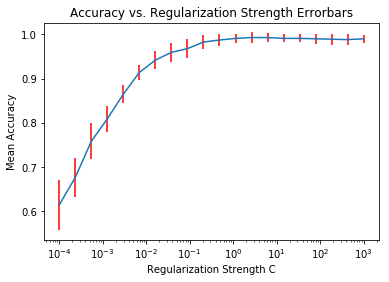

In [136]:
# TODO:  Compute the mean and one SE accuracy and plot with errorbars.
acc_m = np.mean(acc, axis = 1)
acc_se = np.std(acc, axis = 1)

# Visualize the result
plt.figure()
plt.errorbar(C_test, acc_m, yerr=acc_se, ecolor = 'r')
plt.xscale('log')
plt.title("Accuracy vs. Regularization Strength Errorbars")
plt.xlabel('Regularization Strength C')
plt.ylabel('Mean Accuracy')

In [137]:
# TODO:  Compute the optimal C with the one SE rule

# Now find the optimal C using the SE rule
C_mean_list = acc_m.tolist()

# this long line basically finds all indices of those MSE values that are within 1 SE interval
ind = [i for i,x in enumerate(C_mean_list) if ( x < max(acc_m)+acc_se[np.argmax(acc_m)] 
                                                 and x > max(acc_m)-acc_se[np.argmax(acc_m)])]

# since all test alpha's are sorted from small to large the smallest alpha simply has the smallest index!
# so I simply called for optimal alpha by using the smallest index within the interval
print('Optimal C: ', C_test[min(ind)].round(3), '\n')
print('Accuracy under optimal C: ', acc_m[min(ind)].round(3))

Optimal C:  0.207 

Accuracy under optimal C:  0.982


For the optimal `C`, fit the model on the entire training data with l1 regularization. Find the resulting weight matrix, `W_l1`.  Plot the first row of this weight matrix and compare it to the first row of the weight matrix without the regularization.  You should see that, with l1-regularization, the weight matrix is much more sparse and hence the roles of particular genes are more clearly visible.

Text(0,0.5,'Coeff values')

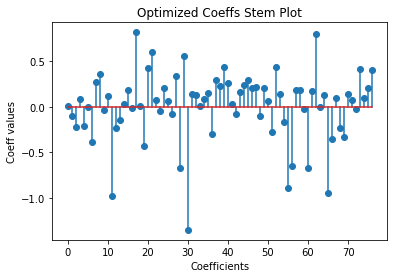

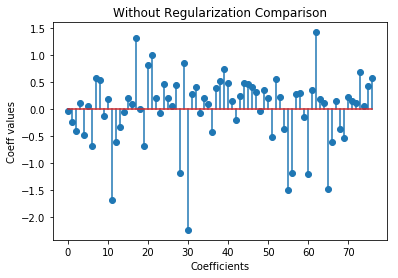

In [154]:
# TODO
# Optimal C
opc = C_test[min(ind)]

# Fit the model on entire training data using the optimal C
logreg = linear_model.LogisticRegression(C=opc)
logreg.fit(Xs, y)

# Obtain the weight matrix
W_l1 = logreg.coef_

# Plot the coefficients
plt.figure()
plt.stem(W_l1[1])
plt.title("Optimized Coeffs Stem Plot")
plt.xlabel("Coefficients")
plt.ylabel("Coeff values")

# Old plot for comparison
plt.figure()
plt.stem(W[1])
plt.title("Without Regularization Comparison")
plt.xlabel("Coefficients")
plt.ylabel("Coeff values")